In [0]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

In [4]:
df = pd.read_csv("C:/Users/H/Downloads/heart/heart.csv")
df.head()

FileNotFoundError: ignored

In [0]:
import seaborn as sns

In [0]:
corr = df.corr()

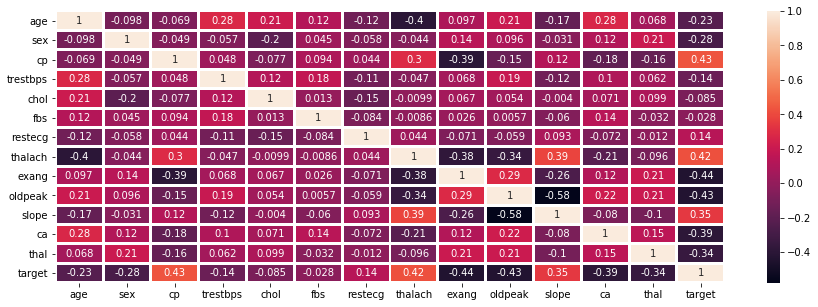

In [0]:
plt.figure(figsize=(15,5))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=2,annot=True)

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [0]:
df.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

In [0]:
#age - age in years
#sex - (1 = male; 0 = female)
#cp - chest pain type
#trestbps - resting blood pressure (in mm Hg on admission to the hospital)
#chol - serum cholestoral in mg/dl
#fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
#restecg - resting electrocardiographic results
#thalach - maximum heart rate achieved
#exang - exercise induced angina (1 = yes; 0 = no)
#oldpeak - ST depression induced by exercise relative to rest
#slope - the slope of the peak exercise ST segment
#ca - number of major vessels (0-3) colored by flourosopy
#thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
#target - have disease or not (1=yes, 0=no)

In [0]:
df.thal.value_counts()

2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [0]:
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

In [0]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,plot_roc_curve

In [0]:
#These three variables are categorical variables
q = pd.get_dummies(df['cp'], prefix = "cp")
w = pd.get_dummies(df['thal'], prefix = "thal")
e = pd.get_dummies(df['slope'], prefix = "slope")

In [0]:
df = pd.concat([df,q,w,e],axis=1)

In [0]:
df = df.drop(columns = ['cp','thal','slope'])

In [0]:
df.head()

,age,sex,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,ca,...,cp_1,cp_2,cp_3,thal_0,thal_1,thal_2,thal_3,slope_0,slope_1,slope_2
0,63,1,145,233,1,0,150,0,2.3,0,...,0,0,1,0,1,0,0,1,0,0
1,37,1,130,250,0,1,187,0,3.5,0,...,0,1,0,0,0,1,0,1,0,0
2,41,0,130,204,0,0,172,0,1.4,0,...,1,0,0,0,0,1,0,0,0,1
3,56,1,120,236,0,1,178,0,0.8,0,...,1,0,0,0,0,1,0,0,0,1
4,57,0,120,354,0,1,163,1,0.6,0,...,0,0,0,0,0,1,0,0,0,1


In [0]:
x = df.drop(columns = ['target'])
y = df['target']
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size = .3,stratify = y,random_state = 100)

In [0]:
xtrain.shape

(212, 21)

In [0]:
xtest.shape

(91, 21)

0.8571428571428571


array([[31, 10],
       [ 3, 47]], dtype=int64)

In [0]:
from sklearn.svm import SVC

In [0]:
model = SVC()
model.fit(xtrain,ytrain)
predictions = model.predict(xtest)
accuracy_score(ytest,predictions)

0.6483516483516484

In [0]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [0]:
for x in range(1,50):
    knn = KNeighborsClassifier(n_neighbors=x,metric='euclidean')
    knn.fit(xtrain,ytrain)
    predictions = knn.predict(xtest)
    print(x,': ',accuracy_score(ytest,predictions))

1 :  0.6703296703296703
2 :  0.6373626373626373
3 :  0.6703296703296703
4 :  0.6373626373626373
5 :  0.6263736263736264
6 :  0.7252747252747253
7 :  0.7032967032967034
8 :  0.6923076923076923
9 :  0.6923076923076923
10 :  0.6373626373626373
11 :  0.6923076923076923
12 :  0.6923076923076923
13 :  0.6813186813186813
14 :  0.6593406593406593
15 :  0.6703296703296703
16 :  0.6593406593406593
17 :  0.6593406593406593
18 :  0.6703296703296703
19 :  0.7032967032967034
20 :  0.6813186813186813
21 :  0.6813186813186813
22 :  0.6373626373626373
23 :  0.6483516483516484
24 :  0.6373626373626373
25 :  0.7252747252747253
26 :  0.6813186813186813
27 :  0.6923076923076923
28 :  0.6813186813186813
29 :  0.6813186813186813
30 :  0.6703296703296703
31 :  0.6813186813186813
32 :  0.6703296703296703
33 :  0.6813186813186813
34 :  0.6593406593406593
35 :  0.6813186813186813
36 :  0.6703296703296703
37 :  0.6813186813186813
38 :  0.6923076923076923
39 :  0.6593406593406593
40 :  0.6593406593406593
41 :  0.6

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(criterion='gini',max_depth=14)

In [0]:
dtree.fit(xtrain,ytrain)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=14, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
p = dtree.predict(xtest)

In [0]:
accuracy_score(ytest,p)

0.7362637362637363

In [0]:
model = RandomForestClassifier(n_estimators=200)
model.fit(xtrain,ytrain)
predictions = model.predict(xtest)
print(accuracy_score(ytest,predictions))
confusion_matrix(ytest,predictions)

0.8681318681318682


array([[32,  9],
       [ 3, 47]], dtype=int64)

In [0]:
import pickle as pk

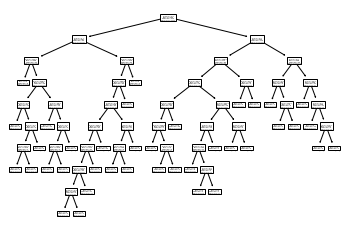

In [0]:
from sklearn import tree
tree.plot_tree(dtree.fit(xtrain,ytrain))
plt.show()

In [0]:
file = open('heart','wb')

In [0]:
pk.dump(model,file)

In [0]:
file.close()

In [0]:
file = open('heart','rb')
rf = pk.load(file)
a = rf.predict(xtest)
accuracy_score(ytest,a)

0.8681318681318682

In [0]:
print(classification_report(ytest,a))

              precision    recall  f1-score   support

           0       0.91      0.78      0.84        41
           1       0.84      0.94      0.89        50

    accuracy                           0.87        91
   macro avg       0.88      0.86      0.86        91
weighted avg       0.87      0.87      0.87        91

